In [1]:
exp_no = 0
gpu_id = 1

import torch
torch.cuda.set_device(gpu_id)

In [2]:
import os
import sys
import git
import pathlib

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

PROJ_ROOT_PATH = pathlib.Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
PROJ_ROOT =  str(PROJ_ROOT_PATH)
if PROJ_ROOT not in sys.path:
    sys.path.append(PROJ_ROOT)

print(f"Project Root Directory: {PROJ_ROOT}")

Project Root Directory: /repos/drl_csense


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import gymnasium as gym

In [5]:
from lib.folder_paths import get_logging_dir
from lib.env_utils import make_atari_env_Compressed_VecFrameStack

In [6]:
env_id = "BreakoutNoFrameskip-v4"
exp_tag = f"CR_{compress_ratio}"
exp_name = f"{env_id}--{exp_tag}"

In [7]:
# Get directories
models_dir, log_dir, gif_dir, image_dir = get_logging_dir(exp_name)

In [62]:
NUM_ENVS = 1
mother_seed = 2023
compress_ratio = 0.4

In [63]:
# Make vector environment
env = make_atari_env_Compressed_VecFrameStack(env_id,
                     n_envs=NUM_ENVS,
                     seed=mother_seed+exp_no,
                    compress_ratio=compress_ratio)

/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


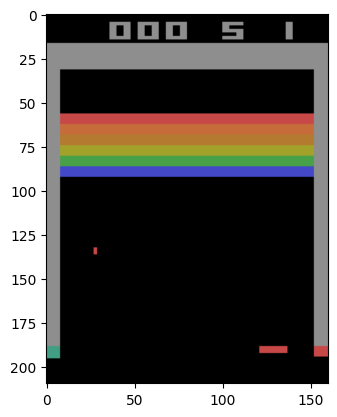

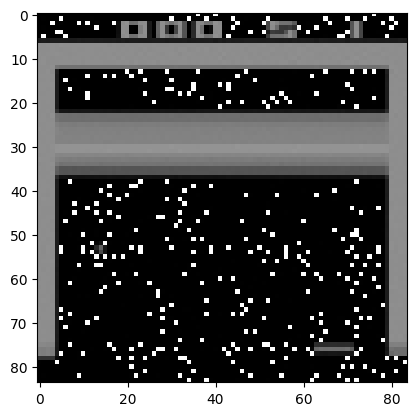

In [64]:
images = []
obss = []
obs = env.reset()
img = env.render(mode="rgb_array")
# for i in range(no_of_frames):
# images.append(img)
# obss.append(obs)
# # action, _ = model.predict(obs)
action = env.action_space.sample() 
obs, reward, done, info = env.step([action])
img = env.render(mode="rgb_array")

plt.figure(0)
plt.imshow(img)

plt.figure(1)
plt.imshow(obs[0,:,:,-1], cmap="gray")